## Diplomado en ciencia de datos 
## Francisco Javier Arellano Salazar 
## Proyecto 2 

El conjunto de datos uttilizado consiste en 300 imágenes de pizza, sushii y steaks.

In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, auc

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

### Carga y formato de imágenes

In [3]:
path = 'archive'
foods = os.listdir(path)

counter = 1
food_labels = {}
food_image_paths = {}
images = []
labels = []

# Asigna una etiqueta numérica a cada tipo de comida y guarda 100 imágenes por tipo
for name in foods:
    image_list = os.listdir(f'{path}/{name}/')
    food_labels[name] = counter
    food_image_paths[name] = image_list[:100]  
    counter += 1

# Asegura que todas las listas tengan la misma longitud
min_length = min(len(lst) for lst in food_image_paths.values())
for key in food_image_paths:
    food_image_paths[key] = food_image_paths[key][:min_length]

# Convierte el diccionario en DataFrame 
df = pd.DataFrame(food_image_paths)

# Carga y redimensiona las imágenes
for row in range(df.shape[0]):
    for column in range(df.shape[1]):
        name = df.columns[column]
        image_name = df.iloc[row, column]
        image = Image.open(f'{path}/{name}/{image_name}')
        image = image.resize((512, 512))
        images.append(image)
        labels.append(food_labels[name])

pizza : 1


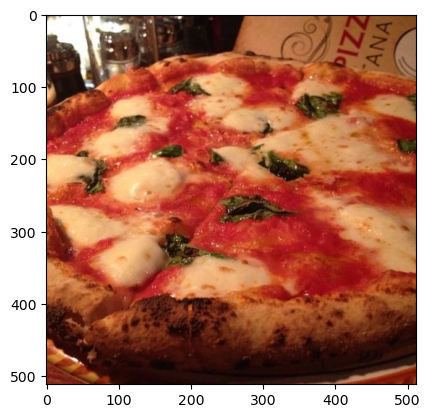

In [4]:
index = 3
food_search = {i: j for j, i in food_labels.items()}
plt.imshow(images[index])
print(food_search[labels[index]], ':', labels[index])

### Entrenamiento del modelo

In [5]:
x, y = np.array(images), np.array(labels)

In [6]:
#División de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.9, test_size=0.1, random_state=5, shuffle=False
)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
def OneHotEncoder(list):
    y_train_ohe = []
    for i in list:
        temp = np.zeros(shape=(3,))
        temp[i - 1] = 1
        y_train_ohe.append(temp)
    y_train_ohe = np.array(y_train_ohe)
    return y_train_ohe

y_train = OneHotEncoder(y_train)
y_test = OneHotEncoder(y_test)

In [8]:
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  

model.summary()

C:\Users\USUARIO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 508032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │      16,257,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,262,243 (62.04 MB)

 Trainable params: 16,262,243 (62.04 MB)

 Non-trainable params: 0 (0.00 B)

La capa de convolución 2D (Conv2D) emplea filtros para analizar imágenes y extraer características clave como bordes, texturas y patrones esenciales para la clasificación de datos visuales. La elección del filtro de tamaño (3, 3) está justificada por los siguientes motivos:
- Tamaño del filtro:- Un filtro (3, 3) equilibra de manera óptima la capacidad de capturar detalles locales sin generar una carga computacional excesiva. Su tamaño estándar es suficientemente pequeño para captar patrones específicos y suficientemente grande para integrar información significativa.

- Número de filtros:- El uso progresivo de 16 filtros en la primera capa y 32 en la segunda permite que el modelo identifique características visuales de complejidad creciente. Este enfoque asegura una mayor riqueza en los mapas de características generados.

- Funcionamiento eficiente:- Al desplazarse sobre la imagen, el filtro realiza cálculos entre sus valores y los píxeles de la imagen, produciendo mapas de características que representan patrones detectados. Esto permite al modelo interpretar datos visuales en términos significativos.

- Activación ReLU:- La función de activación ReLU complementa el uso del filtro al eliminar valores negativos, maximizando la utilidad de las características detectadas. Esto optimiza el enfoque en patrones visuales relevantes, simplificando el entrenamiento del modelo.

- Ventajas del filtro (3, 3):- Detección de patrones locales: Ideal para identificar bordes, esquinas y texturas, que son fundamentales para el análisis visual.
- Eficiencia computacional: Su tamaño pequeño reduce la cantidad de cálculos en comparación con filtros mayores, manteniendo un balance entre precisión y rendimiento.
- Flexibilidad: Permite la combinación gradual de características simples en patrones complejos a medida que el modelo profundiza.

En resumen, el filtro (3, 3) es una elección estratégica que optimiza la extracción de información visual clave, logrando un equilibrio entre eficiencia computacional y precisión en el aprendizaje. Su capacidad para identificar patrones locales y construir representaciones más complejas en las capas posteriores es esencial para el desempeño del modelo en tareas de clasificación visual.





In [9]:
batch_size = 2
epochs = 30
callback = EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    shuffle=True,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.3490 - loss: 3.5930 - val_accuracy: 0.5517 - val_loss: 0.9972
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.5434 - loss: 1.0176 - val_accuracy: 0.5517 - val_loss: 0.9186
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.6664 - loss: 0.6706 - val_accuracy: 0.6552 - val_loss: 0.9108
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.8718 - loss: 0.3633 - val_accuracy: 0.5517 - val_loss: 1.0371
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9620 - loss: 0.2560 - val_accuracy: 0.4483 - val_loss: 1.9698
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9244 - loss: 0.1756 - val_accuracy: 0.4828 - val_loss: 1.2403


### Evaluación y visualización de resultados 

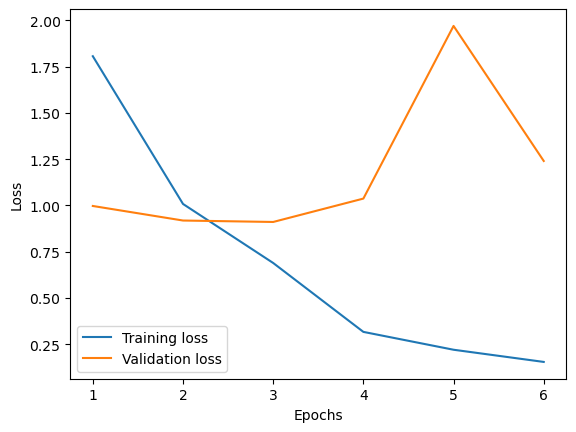

In [10]:
#Visualizaciónn de la función de partición
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)

fig, ax = plt.subplots()
ax.plot(epochs_range, loss, label='Training loss')
ax.plot(epochs_range, val_loss, label='Validation loss')
plt.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_xticks(epochs_range)
plt.show()


In [14]:
# Predicciones y matriz de confusión
predictions = model.predict(x_test)
y_test_decoded = np.argmax(y_test, axis=1)
predictions_decoded = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test_decoded, predictions_decoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


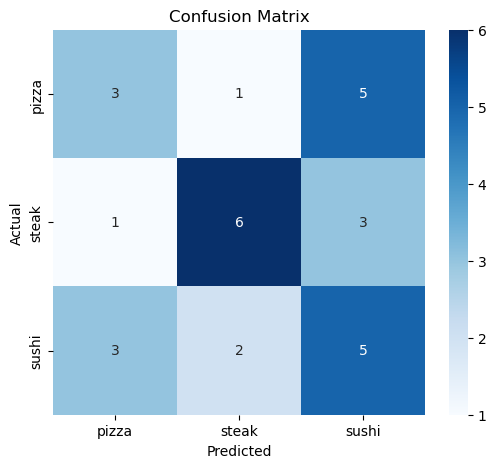

              precision    recall  f1-score   support

       pizza       0.43      0.33      0.38         9
       steak       0.67      0.60      0.63        10
       sushi       0.38      0.50      0.43        10

    accuracy                           0.48        29
   macro avg       0.49      0.48      0.48        29
weighted avg       0.50      0.48      0.48        29



In [15]:
#Crear matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=food_labels.keys(),
            yticklabels=food_labels.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test_decoded, predictions_decoded, target_names=food_labels.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


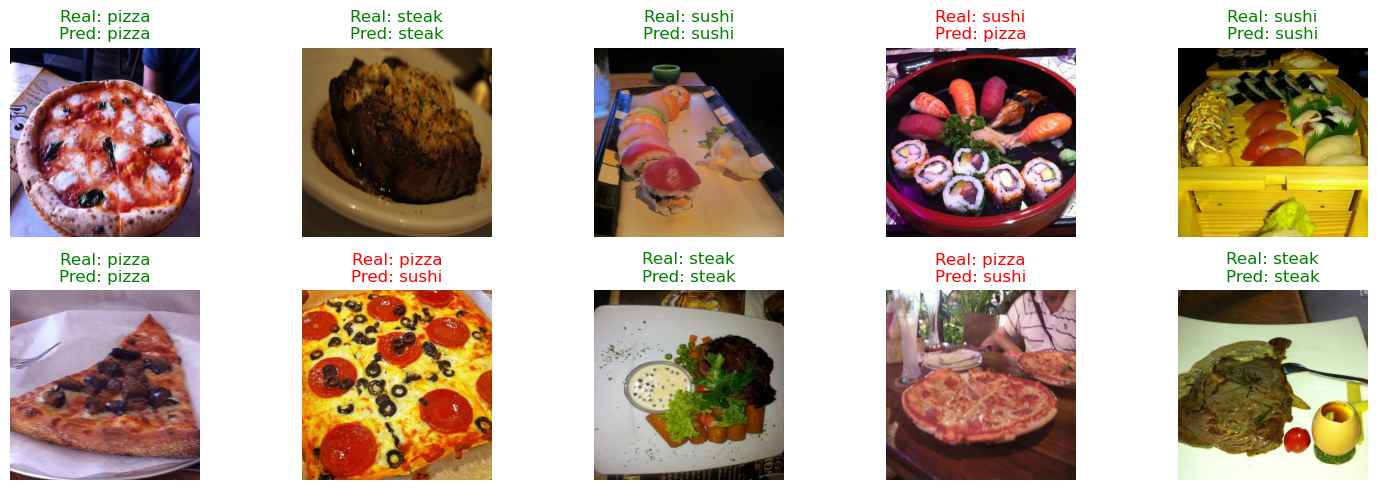

Accuracy del modelo: 48.28%


In [16]:
# Crear diccionario inverso para convertir de etiqueta numérica a nombre
food_search = {i: name for name, i in food_labels.items()}

# Decodificar etiquetas one-hot a enteros
y_test_decoded = np.argmax(y_test, axis=1)
predictions_decoded = np.argmax(model.predict(x_test), axis=1)

# Elegir aleatoriamente algunas imágenes del conjunto de prueba
num_images_to_show = 10
indices = random.sample(range(len(x_test)), num_images_to_show)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    
    # Obtener etiquetas reales y predichas
    true_label = food_search[y_test_decoded[idx]+1]
    pred_label = food_search[predictions_decoded[idx]+1]
    
    # Colorear el título según si la predicción fue correcta
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
#Precisión del modelo
accuracy = accuracy_score(y_test_decoded, predictions_decoded)
print(f"Accuracy del modelo: {accuracy * 100:.2f}%")

